<a href="https://colab.research.google.com/github/Gatwaza/alu-machine_learning/blob/master/ml_pipeline_Jean_Robert_Gatwaza_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: Heart Disease Painter

## Student Name: Jean Robert Gatwaza

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   **Your answer for data sources goes here **
   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   **Your answer for data agggregation goes here **



In [2]:
### Data Sources and Aggregation

# 1. Data Sources:
#    - The dataset is sourced from a heart disease prediction dataset available in CSV format.
#2. Data Aggregation:
#   - In this project, there is no need for data aggregation from multiple sources as we are using a single dataset.




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **Your answer for data transformation goes here **

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
  **Insert code for data exploration below**


   index  Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  \
0      0   70    1                4  130          322             0   
1      1   67    0                3  115          564             0   
2      2   57    1                2  124          261             0   
3      3   64    1                4  128          263             0   
4      4   74    0                2  120          269             0   

   EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0            2     109                0            2.4            2   
1            2     160                0            1.6            2   
2            0     141                0            0.3            1   
3            0     105                1            0.2            2   
4            2     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7    

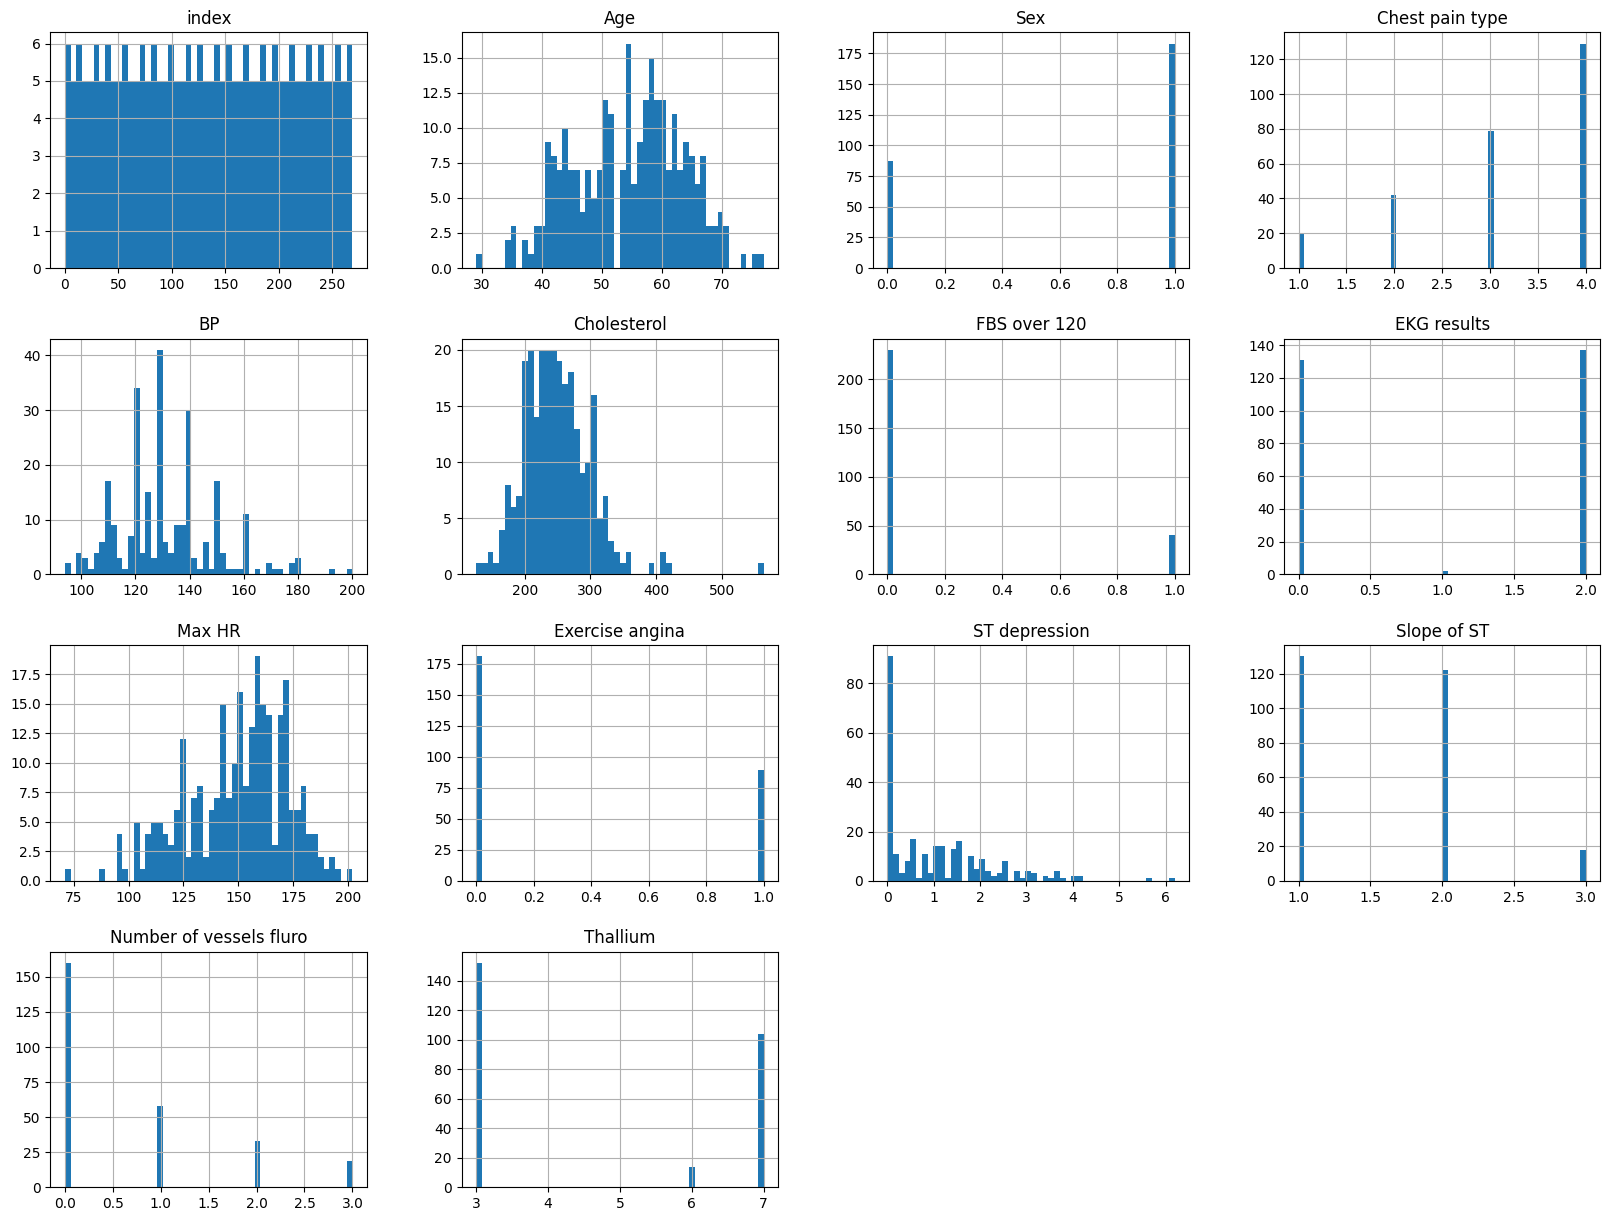

ValueError: could not convert string to float: 'Presence'

<Figure size 1000x800 with 0 Axes>

In [3]:
### Data Format Transformation

# 1. Current Format:
#   - The data is currently in CSV format.

# 2. Planned Transformation:
#   - The data is already in a format suitable for analysis. We will perform necessary data cleaning, normalization, and encoding.

### Data Exploration

#1. Features:
#   - Age: Age of the patient
#   - Sex: Sex of the patient (1 = male, 0 = female)
#   - Chest pain type: Type of chest pain experienced
#   - BP: Blood pressure level
#   - Cholesterol: Cholesterol level
#   - FBS over 120: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
#   - EKG results: Electrocardiographic results
#   - Max HR: Maximum heart rate achieved
#   - Exercise angina: Exercise-induced angina (1 = yes, 0 = no)
#   - ST depression: ST depression induced by exercise relative to rest
#   - Slope of ST: Slope of the peak exercise ST segment
#   - Number of vessels fluro: Number of major vessels (0-3) colored by fluoroscopy
#   - Thallium: Thallium stress test result
#   - Heart Disease: Presence of heart disease (1 = presence, 0 = absence)

#2. Exploratory Data Analysis:

# Data Exploration Code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/content/Heart_Disease_Prediction.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Plotting distributions
data.hist(bins=50, figsize=(20, 15))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()






4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

    ***Hypothesis Testing***

1. **Preexisting Hypotheses:**
   - Patients with higher cholesterol levels are more likely to have heart disease.
   - There is a significant correlation between age and the presence of heart disease.

2. **Testing Methodologies:**
   - Use Pearson correlation coefficient to test the correlation between cholesterol levels and heart disease.
   - Perform t-tests to compare the mean age of patients with and without heart disease.


5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   **Insert code for Handling Sparse/Dense Data and Outliers below**

In [6]:
import numpy as np

# Data Density Assessment
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("Missing Values Percentage:\n", missing_percentage)

# Imputing missing values for numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns
for column in numerical_features:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mean(), inplace=True)

# Imputing missing values for categorical features
categorical_features = data.select_dtypes(exclude=[np.number]).columns
for column in categorical_features:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Handling Outliers by capping values at the 1st and 99th percentiles
def cap_outliers(series):
    lower_limit = series.quantile(0.01)
    upper_limit = series.quantile(0.99)
    series = np.where(series < lower_limit, lower_limit, series)
    series = np.where(series > upper_limit, upper_limit, series)
    return series

for column in numerical_features:
    data[column] = cap_outliers(data[column])

# Display the cleaned data
print(data.head())


Missing Values Percentage:
 index                      0.0
Age                        0.0
Sex                        0.0
Chest pain type            0.0
BP                         0.0
Cholesterol                0.0
FBS over 120               0.0
EKG results                0.0
Max HR                     0.0
Exercise angina            0.0
ST depression              0.0
Slope of ST                0.0
Number of vessels fluro    0.0
Thallium                   0.0
Heart Disease_Absence      0.0
Heart Disease_Presence     0.0
dtype: float64
      index       Age       Sex  Chest pain type        BP  Cholesterol  \
0 -1.688927  1.743376  0.689500         0.870928 -0.073193     1.502826   
1 -1.688927  1.407724 -1.450327        -0.183559 -0.937421     3.257644   
2 -1.688927  0.288884  0.689500        -1.238045 -0.418884     0.244367   
3 -1.688545  1.072072  0.689500         0.870928 -0.188423     0.285628   
4 -1.675704  1.865259 -1.450327        -1.238045 -0.649345     0.409411   

   FBS ove

6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    ***Handling Sparse/Dense Data and Outliers***

1. **Data Density Assessment:**
   - Assess the density of the dataset by calculating the percentage of missing values in each feature.

2. **Handling Strategies:**
   - Impute missing values using mean, median, or mode for numerical features.
   - Use dummy variables or drop rows for categorical features with missing values.
   - Handle outliers by capping values at the 1st and 99th percentiles.





   index  Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  \
0      0   70    1                4  130          322             0   
1      1   67    0                3  115          564             0   
2      2   57    1                2  124          261             0   
3      3   64    1                4  128          263             0   
4      4   74    0                2  120          269             0   

   EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0            2     109                0            2.4            2   
1            2     160                0            1.6            2   
2            0     141                0            0.3            1   
3            0     105                1            0.2            2   
4            2     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7    

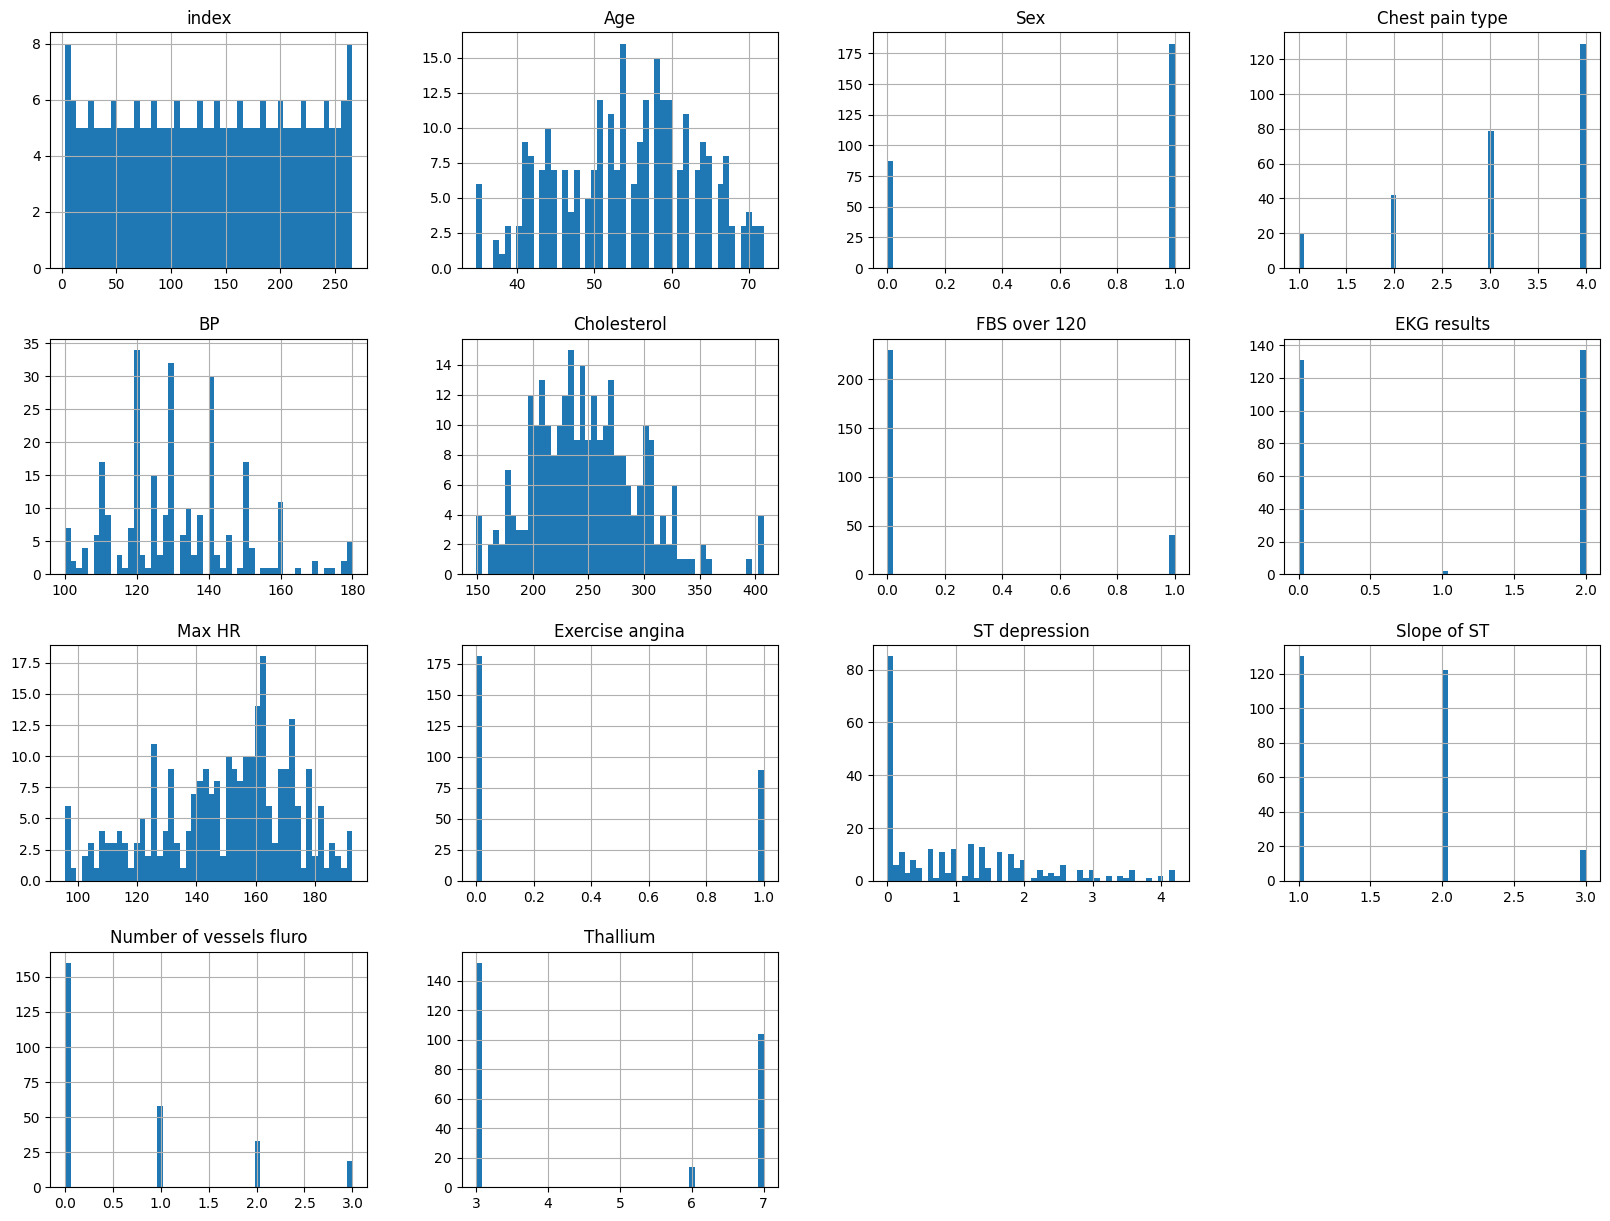

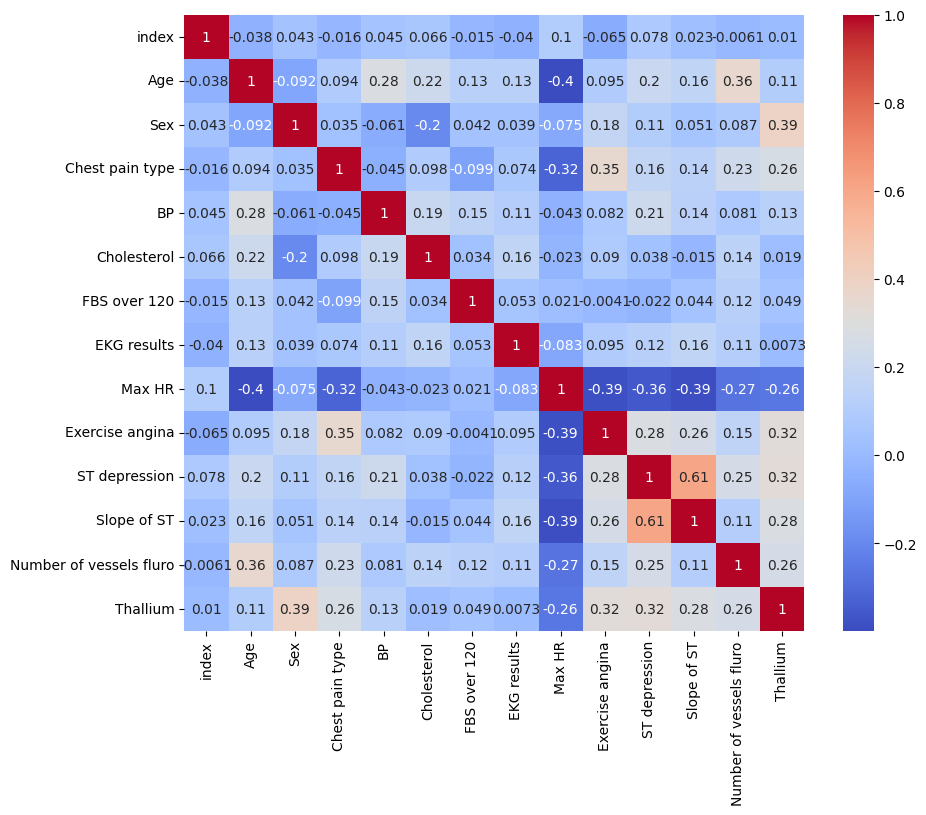

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
dataset_path = '/content/Heart_Disease_Prediction.csv'
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print(data.head())

# Data Density Assessment
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("Missing Values Percentage:\n", missing_percentage)

# Imputing missing values for numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns
for column in numerical_features:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mean(), inplace=True)

# Imputing missing values for categorical features
categorical_features = data.select_dtypes(exclude=[np.number]).columns
for column in categorical_features:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Handling Outliers by capping values at the 1st and 99th percentiles
def cap_outliers(series):
    lower_limit = series.quantile(0.01)
    upper_limit = series.quantile(0.99)
    series = np.where(series < lower_limit, lower_limit, series)
    series = np.where(series > upper_limit, upper_limit, series)
    return series

for column in numerical_features:
    data[column] = cap_outliers(data[column])

# Display the cleaned data
print(data.head())

# Summary statistics
print(data.describe())

# Plotting distributions
data.hist(bins=50, figsize=(20, 15))
plt.show()

# Convert categorical variables to numeric, if necessary
# For example, if 'Sex' is a categorical variable with 'Male' and 'Female', convert them to 0 and 1
if 'Sex' in categorical_features:
    data['Sex'] = data['Sex'].map({'Male': 0, 'Female': 1})

# Ensure all data used for the correlation heatmap is numeric
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()




8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [**insert text for preprocessing steps**]


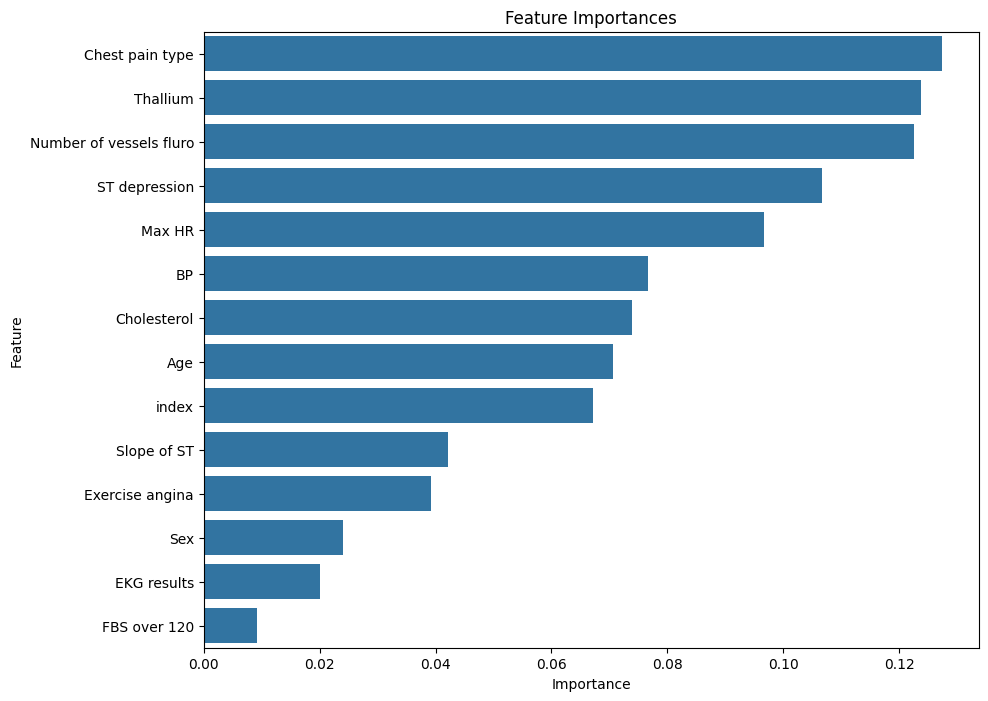

      index       Age       Sex  Chest pain type        BP  Cholesterol  \
0 -1.692525  1.743376  0.689500         0.870928 -0.073193     1.502826   
1 -1.692525  1.407724 -1.450327        -0.183559 -0.937421     3.269206   
2 -1.692525  0.288884  0.689500        -1.238045 -0.418884     0.244367   
3 -1.688545  1.072072  0.689500         0.870928 -0.188423     0.285628   
4 -1.675704  1.959312 -1.450327        -1.238045 -0.649345     0.409411   

   FBS over 120  EKG results    Max HR  Exercise angina  ST depression  \
0     -0.417029     0.981664 -1.796741        -0.701222       1.241246   
1     -0.417029     0.981664  0.451853        -0.701222       0.512490   
2     -0.417029    -1.026285 -0.385859        -0.701222      -0.671737   
3     -0.417029    -1.026285 -1.973102         1.426081      -0.762831   
4     -0.417029     0.981664 -1.267660         1.426081      -0.762831   

   Slope of ST  Number of vessels fluro  Thallium  Heart Disease_Absence  \
0     0.676419              

In [8]:
#print out relevant features
# Feature Selection using RandomForest to determine feature importance
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Train a RandomForest model to determine feature importance
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

# Data Transformation: Normalize numerical features and encode categorical features
# Normalize numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Encode categorical features
data = pd.get_dummies(data, columns=categorical_features)

# Display the transformed data
print(data.head())



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.